In [13]:
# Spanish Wine Analysis:
#----------------------#

# Importing needed libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.cluster import Kmeans
import warnings
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


warnings.filterwarnings("ignore", category=FutureWarning)


In [26]:
# importing, conducting exploratory data analysis and data cleansing:

df = pd.read_csv("wines_SPA.csv") # Downloaded from Kaggle: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset
df.head(25)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00000,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50000,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95000,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96000,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06000,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00000,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00000,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89000,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00000,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00000,Ribera Del Duero Red,5.0,3.0


In [15]:
""" df['winery'].nunique() # 480 entries
df['country'].nunique() # spain (only country)
df['region'].nunique() # 76 different regions
df['type'].nunique() # 21 different types
df['rating'].nunique() # 8 different ratings
df['wine'].nunique() # 847 different wines
df['year'].nunique() # 71 different years
df['num_reviews'].nunique() # 817 different reviews """

df_cleansed = df.dropna(axis=1)

C:\Users\Christopher K. Leal\AppData\Local\Temp\ipykernel_17320\1729619887.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['Score'] = df_cleansed['rating'].apply(rating_vals)


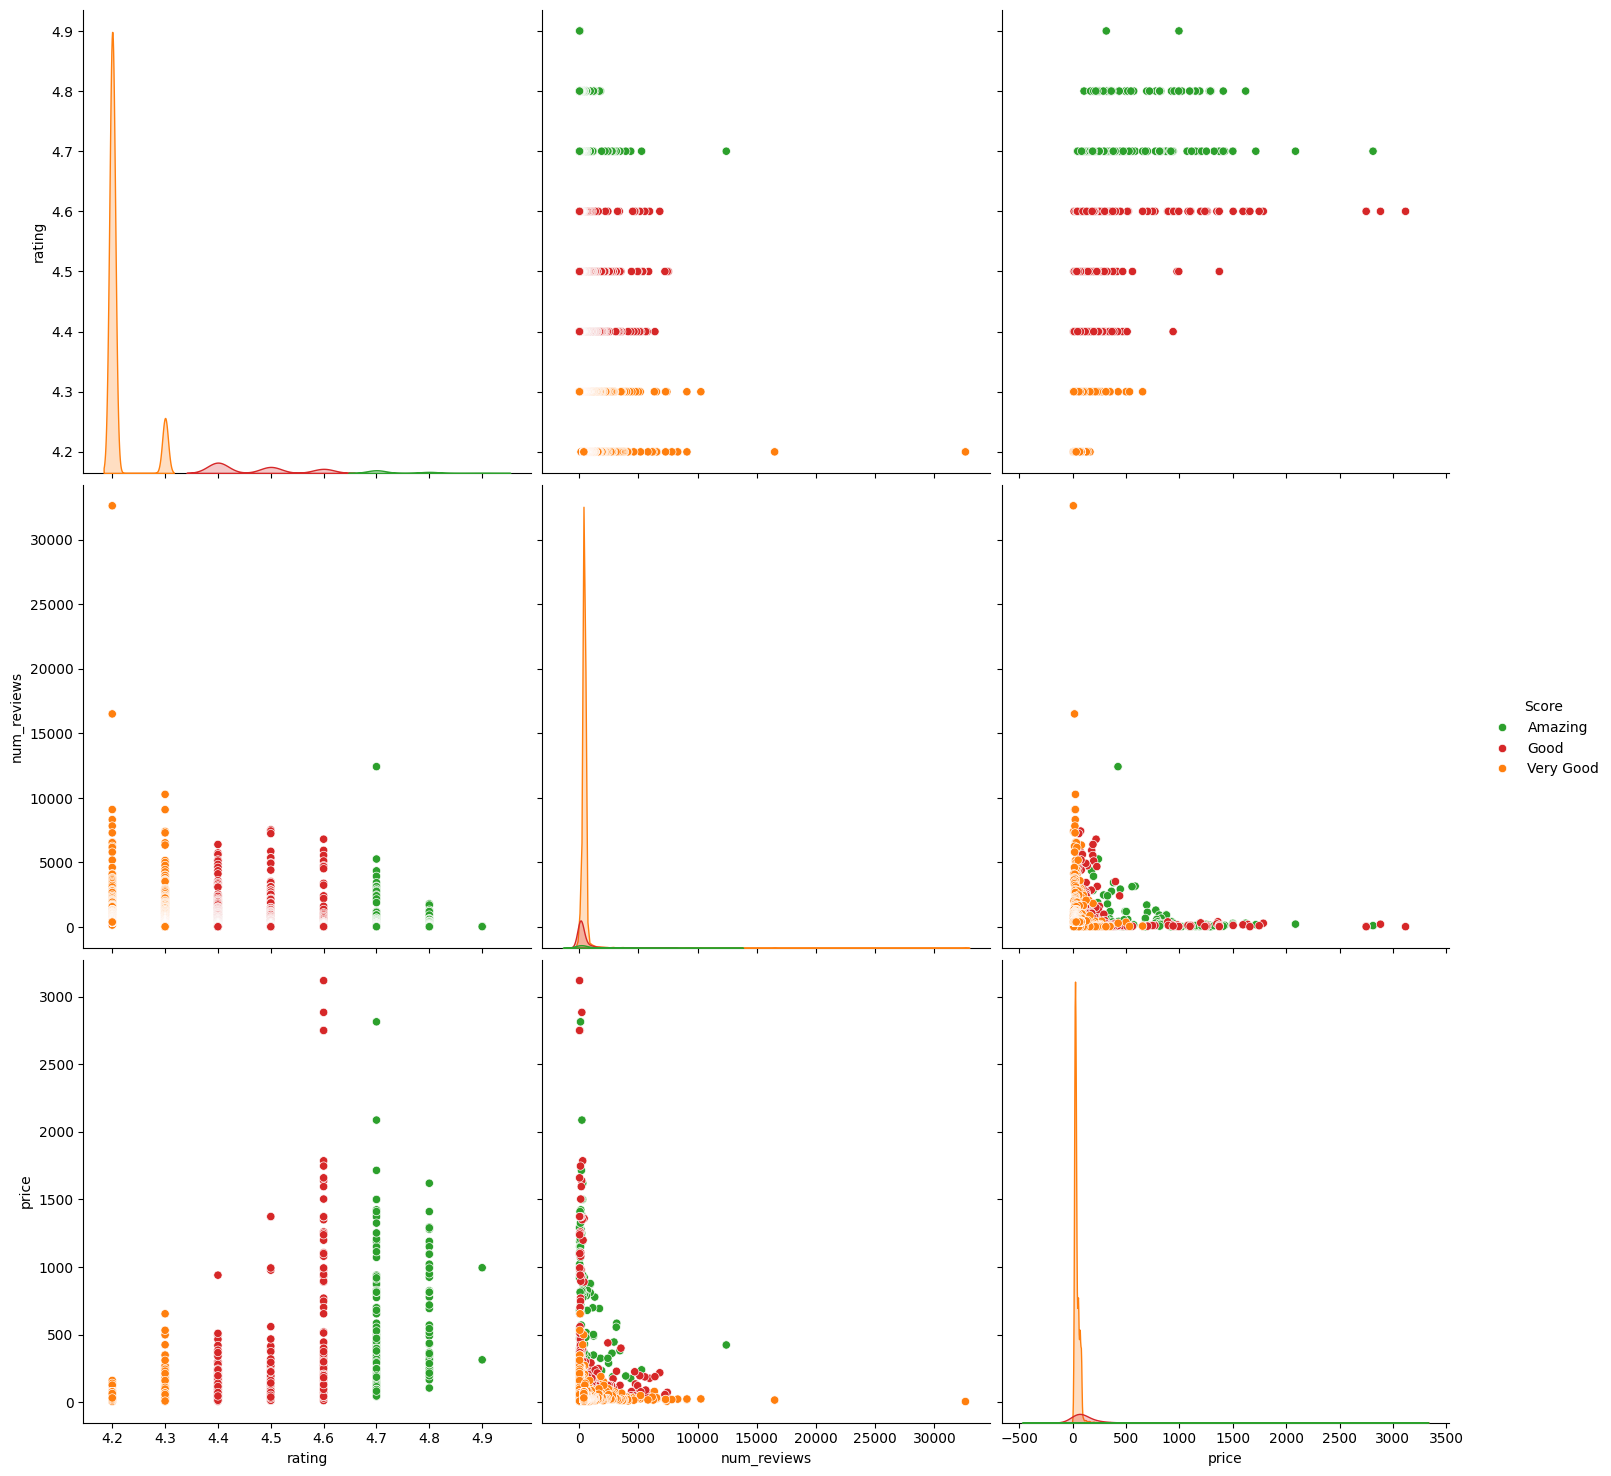

In [16]:
# Creating a function for color-coding ratings levels from Low to High:

def rating_vals(rating):
    if rating <= 4.3:
        return 'Very Good'
    elif rating >= 4.7:
        return 'Amazing'
    else:
        return 'Good'
    
df_cleansed['Score'] = df_cleansed['rating'].apply(rating_vals)

sns.pairplot(df_cleansed, hue='Score', palette={'Good':'tab:red','Very Good':'tab:orange', 'Amazing':'tab:green'}, height=5)


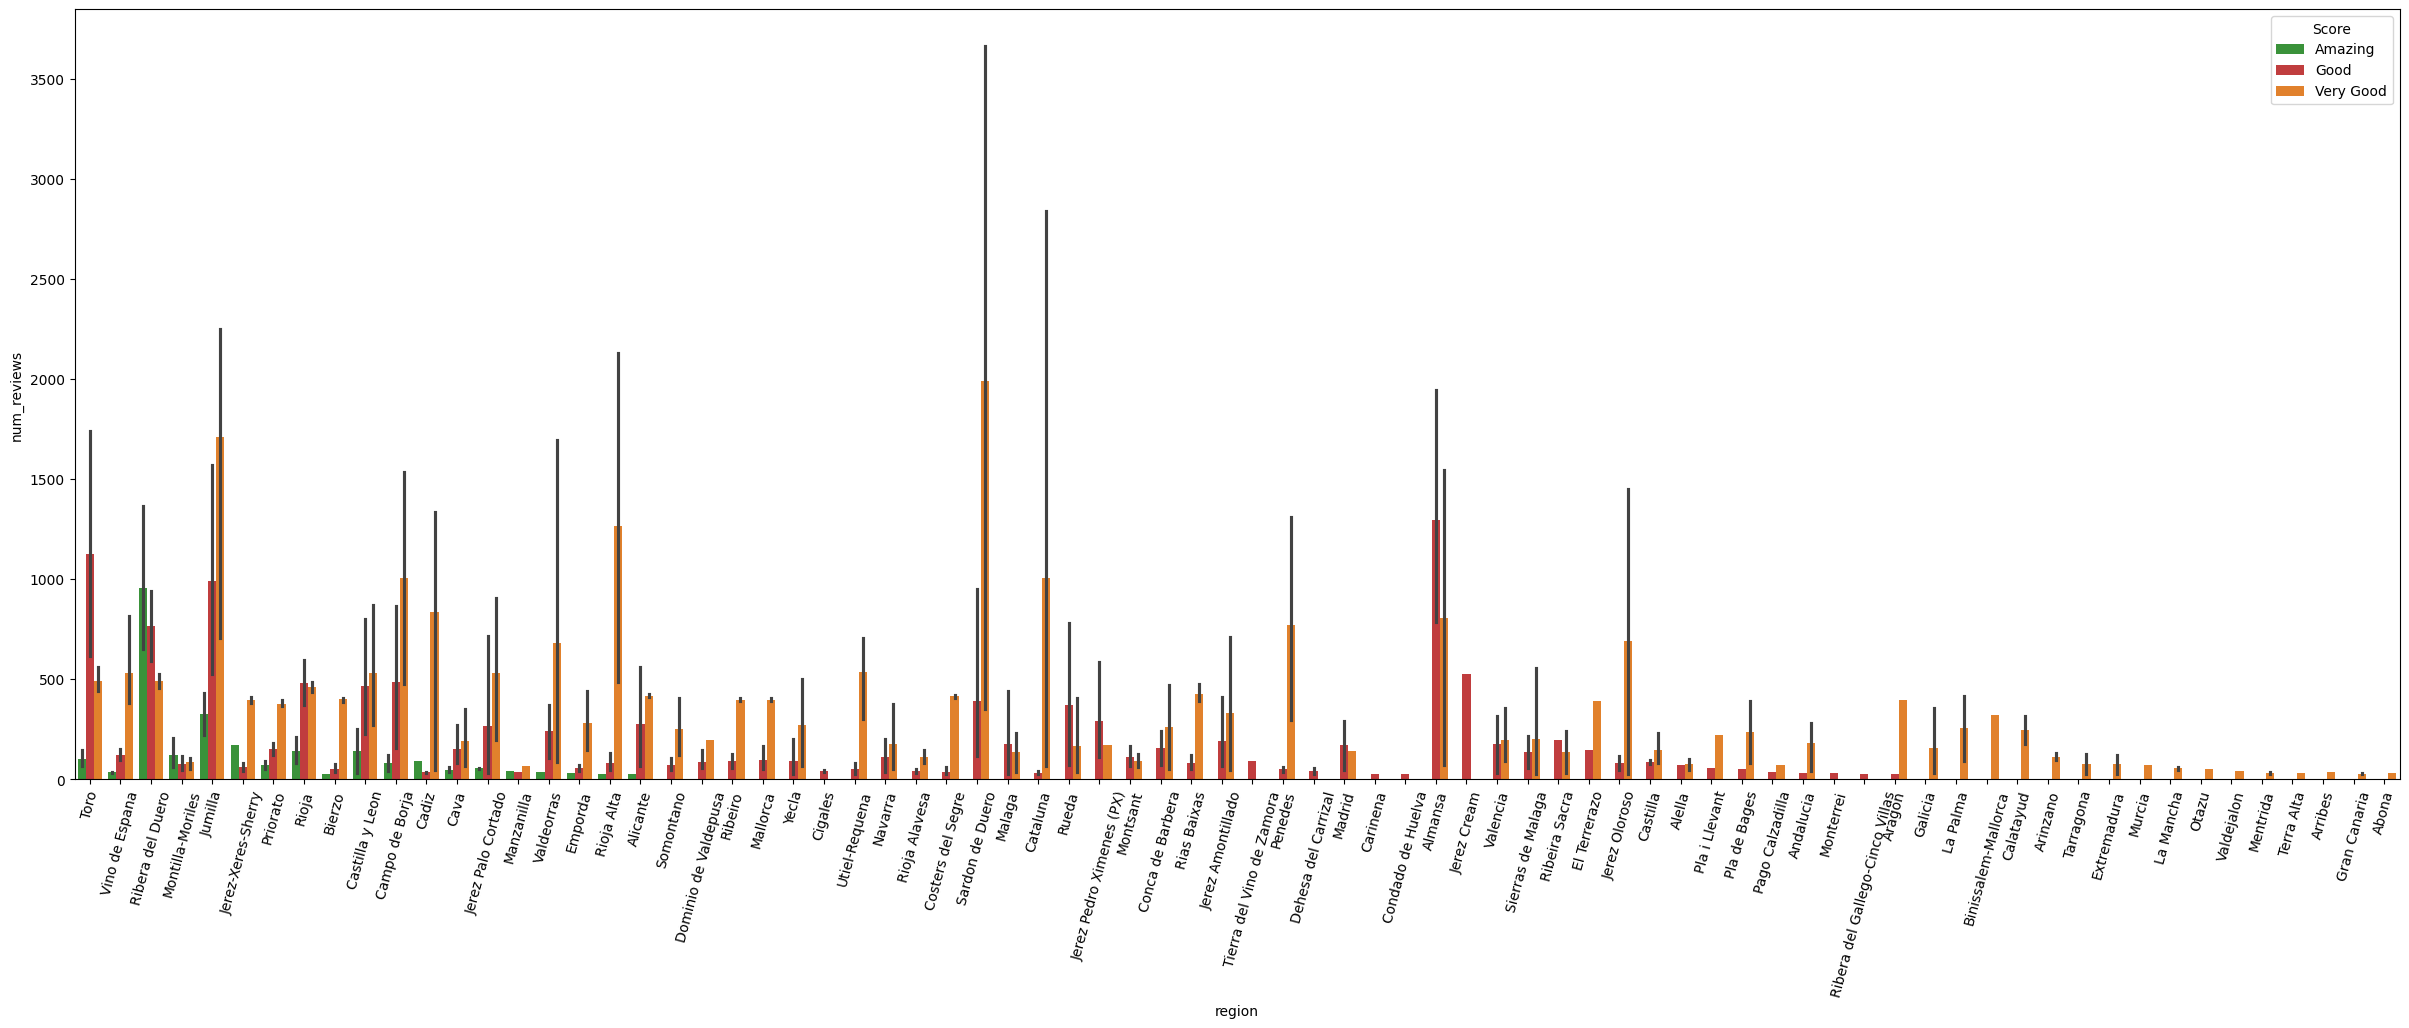

In [17]:
# The following plot leverages the same scoring function to view the results based on the region and showing the total number of reviews for each color:

plt.figure(figsize=[30, 10])
sns.barplot(data=df_cleansed, x='region', y='num_reviews', hue='Score', palette={'Good':'tab:red','Very Good':'tab:orange', 'Amazing':'tab:green'})
plt.xticks(rotation=75)
plt.show()

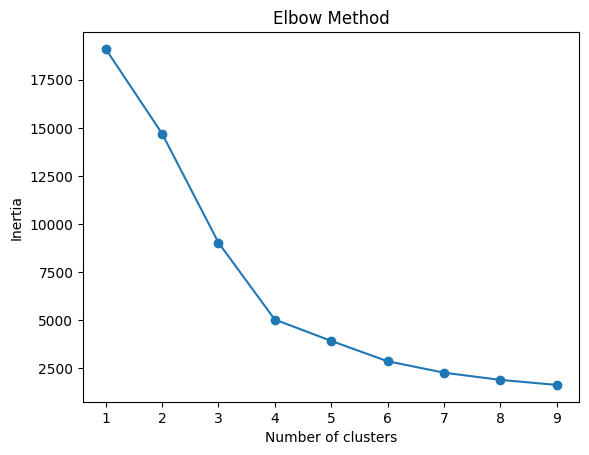

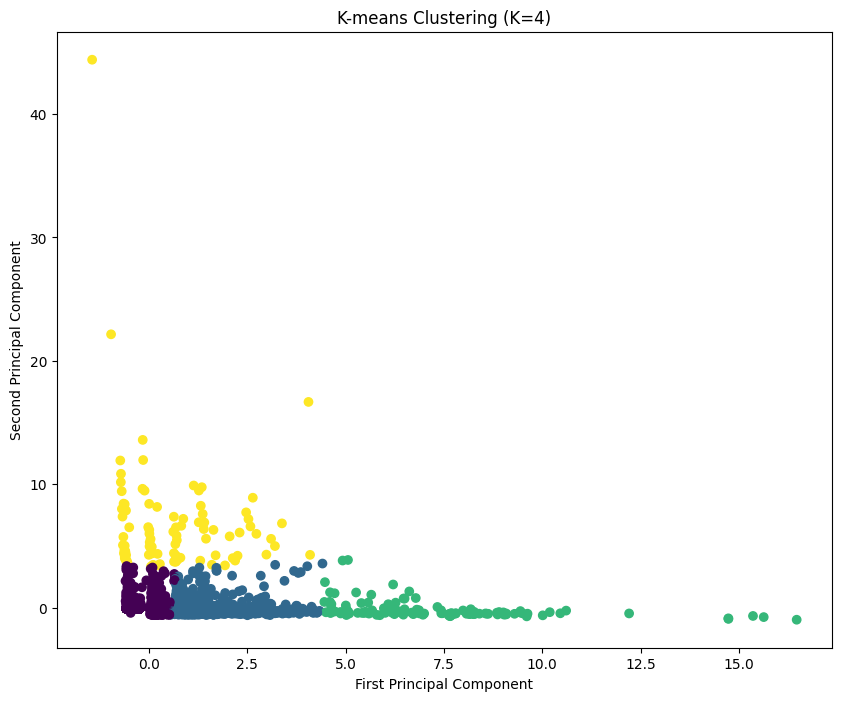

In [18]:
# Now, I'm curious to see how a K-Means clustering algorithm would work with this data.
# I will create a pipeline to further organize and make my code more efficient.:
# In order to leverage things outside of Scikit, I need to create a column transformer.:

df_kmeans_data = df_cleansed[['rating', 'num_reviews', 'price']]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), df_kmeans_data.columns)], remainder='passthrough')

# Next, I define the pipeline:
pipeline_1 = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', PCA(n_components=2))
    ])

# Now, I will apply the pipeline to the data:
df_pca = pipeline_1.fit_transform(df_kmeans_data)

# Iterating to determine the best value for the number of clusters:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Now that I know what value fits my model best, I will redo the fitting of the model and plot it out with the best value for 'K':
n_clusters = 4

plt.figure(figsize=[10,8])
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
The best parameters for this model are:  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.94      0.97        49

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



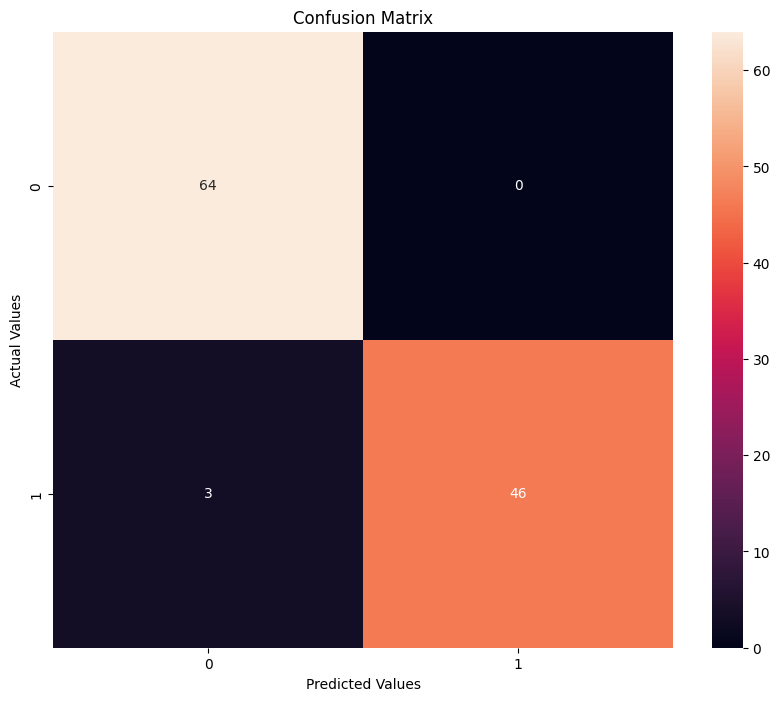

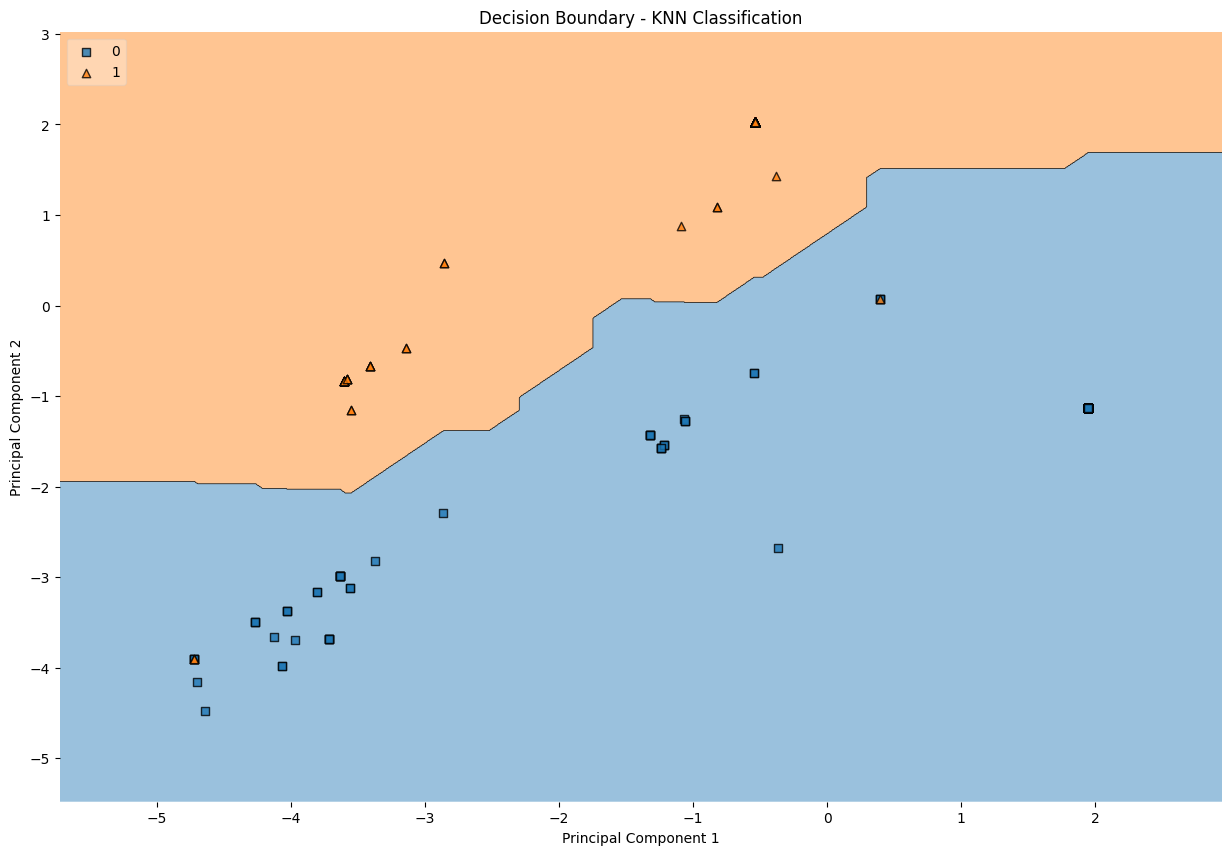

In [31]:
# Now, let's see how a KNN model looks. I will start back from df_cleansed:

specific_regions = ['Toro', 'Vino de Espana']
filtered_df = df_cleansed[df_cleansed['region'].isin(specific_regions)]

categorical_data = filtered_df[['winery', 'wine', 'country', 'Score']]

KNN_feature_preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_data.columns)], remainder='passthrough')

preprocessed_data = KNN_feature_preprocessor.fit_transform(categorical_data)

label_enc = LabelEncoder()
target = label_enc.fit_transform(filtered_df['region'])


X_train, X_test, Y_train, Y_test = train_test_split(preprocessed_data, target, random_state=42, test_size=0.2)


scaler = StandardScaler(with_mean=False)
# X_train scaling:
X_train_scaled = scaler.fit_transform(X_train)
#X_test scaling:
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
#  X_train PCA:
X_train_pca = pca.fit_transform(X_train_scaled)
# X_test PCA:
X_test_pca = pca.transform(X_test_scaled)


# Now I will create a GridSearchCV for automating the hyperparameter tuning process.

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
'p': [1, 2]}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=1, verbose=1)
grid_search.fit(X_train_pca, Y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("The best parameters for this model are: ", best_params)


final_prediction = best_estimator.predict(X_test_pca)
final_prediction_unencoded = label_enc.inverse_transform(final_prediction)
Y_test_unencoded = label_enc.inverse_transform(Y_test)

# Classification report
class_met = metrics.classification_report(Y_test, final_prediction)
print(class_met)

# Confusion matrix
conf_mat = metrics.confusion_matrix(Y_test_unencoded, final_prediction_unencoded)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

# Decision boundary plot (requires numerical Y labels)
plt.figure(figsize=(15, 10))
plot_decision_regions(X_train_pca, Y_train, clf=best_estimator, legend=2)
plt.title(f"Decision Boundary - KNN Classification")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


The variance ratio is:  2


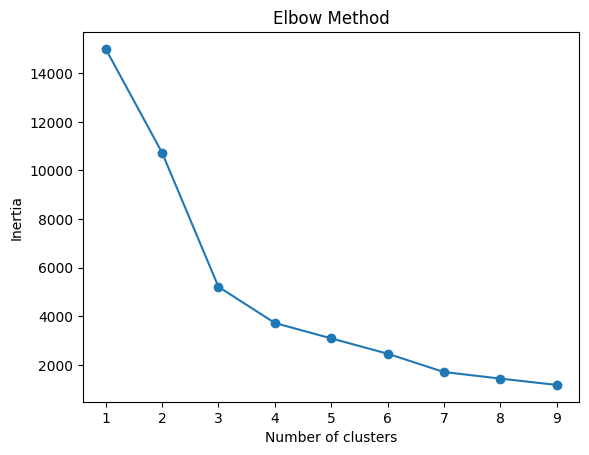

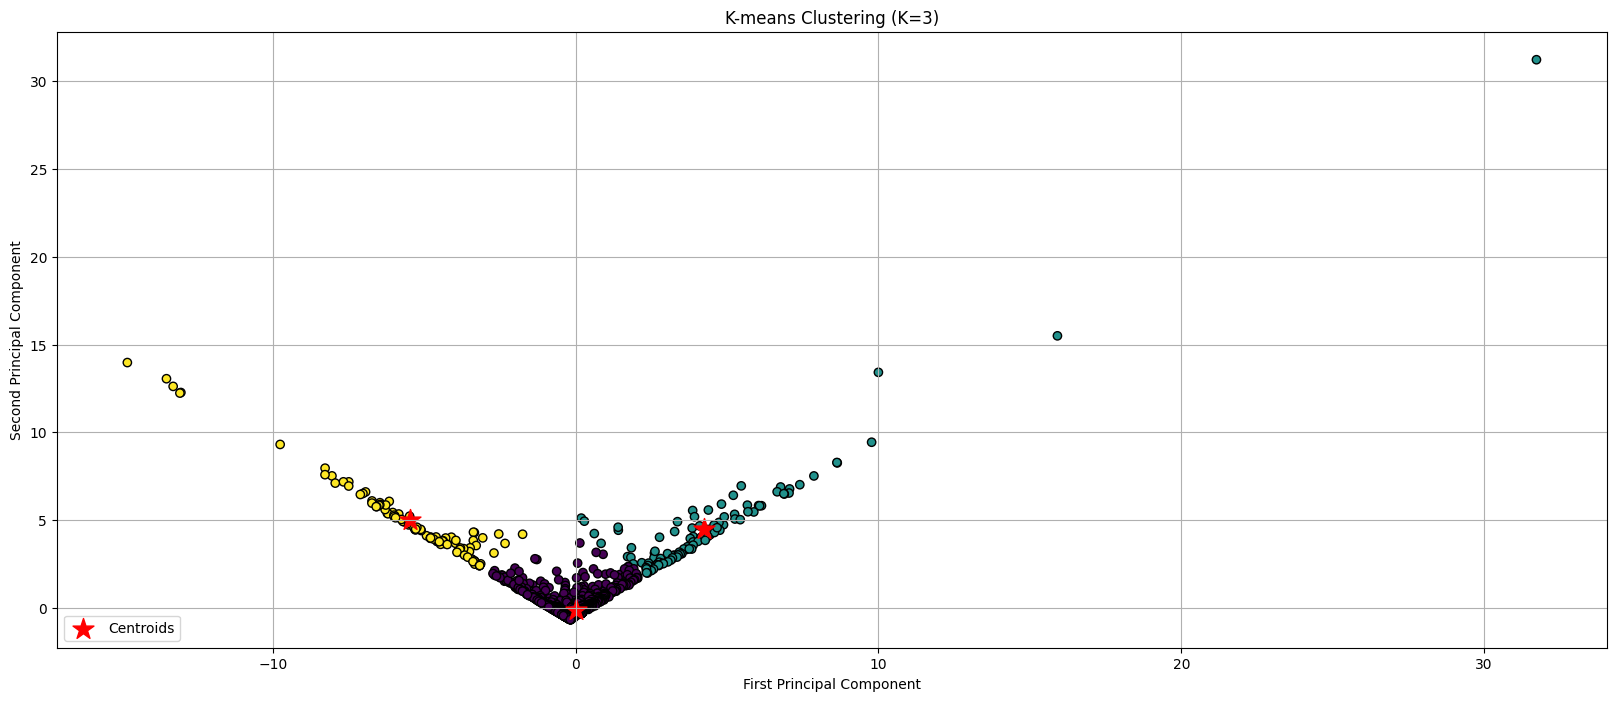

In [20]:
# Next, I want to see what the data would look like when leveraging K-Means clustering for something more specific to see how else data can be visualized. 

df_cleansed.head()
reformated_df_cleansed = df_cleansed.drop(['region', 'country', 'winery', 'wine', 'rating', 'Score'], axis=1)


# Next, I scale the data and then perform dimesionality reduction with PCA:

std_data = scaler.fit_transform(reformated_df_cleansed)
dim_reduction = pca.fit(std_data)
dim_reduction.explained_variance_ratio_
n_components = sum(dim_reduction.explained_variance_ratio_ > 0.1)
data_dim_red = pca.fit_transform(std_data)
print("The variance ratio is: ", n_components)


# Elbow Plot used to determine the best value of 'K' for the number of clusters:

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_dim_red)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 3


# The following code block assigns the Kmeans model to a variable and is then used to plot the data including the centroids. See mlxtend documentation for details.

kmeans = KMeans(n_clusters=3, random_state=42).fit(data_dim_red)

plt.figure(figsize=[20, 8])
plt.scatter(data_dim_red[:, 0],data_dim_red[:, 1],c=kmeans.labels_, edgecolors='black')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")

# Plotting the centroids:
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=250,marker='*',c='red',label='Centroids')

# Adding legends for clusters (but not indexing with `prediction`)
plt.legend(loc='lower left', scatterpoints=1)
plt.grid()
plt.show()

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 1.0
              precision    recall  f1-score   support

     Amazing       1.00      1.00      1.00        70
        Good       1.00      1.00      1.00       393
   Very Good       1.00      1.00      1.00      2537

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



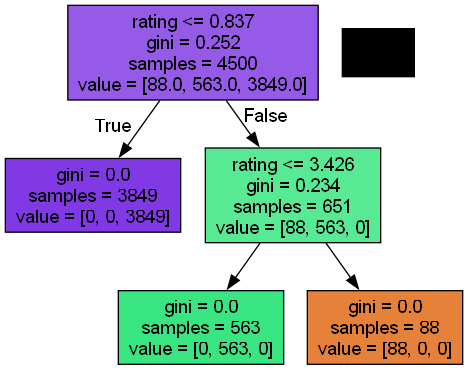

In [21]:
# The next thing I want to do is to create a Decision Tree that can assist me with creating a flowchart of how certain wines should be recommended.

X = df_cleansed.drop('Score', axis=1)
Y = df_cleansed['Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.4)

Dec_Tree_preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X.select_dtypes(include=['object']).columns)],
    remainder='passthrough'  # Keep numerical columns as they are
)

X_train_encoded = Dec_Tree_preprocessor.fit_transform(X_train)
X_test_encoded = Dec_Tree_preprocessor.transform(X_test)

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train_encoded)
X_test_scaled = std_scaler.transform(X_test_encoded)

parameters = {'criterion': ['gini', 'entropy'],
'splitter': ['best', 'random'],
'max_depth': [2*n for n in range(1, 10)],
'max_features': ['sqrt','log2', None],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10]}


grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=parameters,
    scoring='accuracy',  
    cv=5,                
    verbose=1,           
    n_jobs=-1            
)

grid_search.fit(X_train_scaled, Y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model_predictions = best_model.predict(X_test_scaled)
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

class_report = metrics.classification_report(Y_test, best_model_predictions)
print(class_report)

cat_columns = X.select_dtypes(include=['object']).columns
onehot_columns = Dec_Tree_preprocessor.transformers_[0][1].get_feature_names_out(cat_columns)

# Combine with numerical columns
feature_names = list(onehot_columns) + [col for col in X.select_dtypes(exclude=['object']).columns]


dot_data = StringIO()
export_graphviz(best_model, out_file=dot_data, filled=True, feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Wines_Tree.png')
Image(graph.create_png())